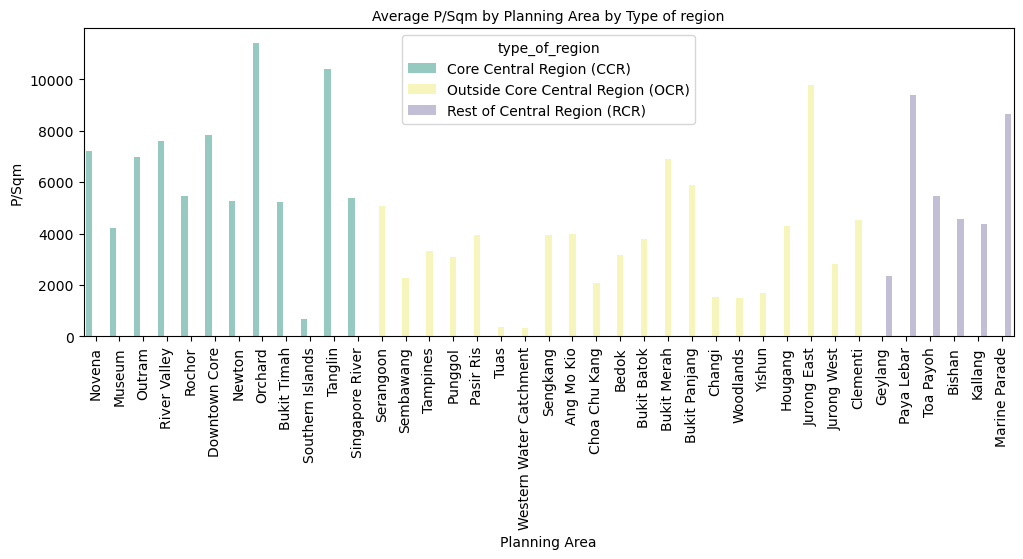

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

URA_Data = pd.read_csv('Vacant site by URA - additional details.csv')
URA_Data

import re

def clean_and_convert_price(price):
    if isinstance(price, str):
        # Using regular expression to remove commas and other non-numeric characters
        price = re.sub(r'[^\d.]', '', price)
    try:
        return float(price)
    except ValueError:
        return None
    
URA_Data["psm_per_gpr_or_gfa"] = URA_Data["psm"].apply(clean_and_convert_price)
    
average_prices = URA_Data.groupby(["planning_area", "type_of_region"])["psm_per_gpr_or_gfa"].mean().reset_index()

average_prices = average_prices.sort_values(by="type_of_region")

plt.figure(figsize=(12, 4))
sns.barplot(data=average_prices, x="planning_area", y="psm_per_gpr_or_gfa", hue="type_of_region", palette="Set3")
plt.title('Average P/Sqm by Planning Area by Type of region', fontsize=10)
plt.xlabel('Planning Area')
plt.ylabel('P/Sqm')
plt.xticks(rotation=90, fontsize=10)  # Rotate the lbels by 45 degrees


plt.show()

In [ ]:
location_avg = URA_Data.groupby("planning_area")["psm_per_gpr_or_gfa"].mean()
location_avg = location_avg.sort_values()


plt.figure(figsize=(10, 6)) 
location_avg.plot(kind="bar")
plt.title("Average PSM by Location")
plt.xlabel("Planning Area")
plt.ylabel("Average PSM")
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.scatter(URA_Data['no_of_bids'], URA_Data['psm_per_gpr_or_gfa'], alpha=0.4)

plt.xlabel('Number of Bids', fontsize=14)
plt.ylabel('Price per Square Meter', fontsize=14)
plt.show()

In [ ]:


plt.scatter(URA_Data['planning_area'], URA_Data['no_of_bids'], alpha=0.4)

plt.xlabel('Number of Bids', fontsize=8)
plt.ylabel('Planning Area', fontsize=8)
plt.xticks(rotation=90, fontsize = 8)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:

URA_Data.head()

In [2]:
import statsmodels.api as sm

URA_Data['date_of_launch'] = pd.to_datetime(URA_Data['date_of_launch'])
URA_Data['date_of_tender_closing'] = pd.to_datetime(URA_Data['date_of_tender_closing'])

# Calculate the tender period in days and create a new column
URA_Data['tender_period'] = (URA_Data['date_of_tender_closing'] - URA_Data['date_of_launch']).dt.days

# Define the dependent variable
yvar = 'psm_per_gpr_or_gfa'

# Define the independent variables of interest
xvars = ['no_of_bids','GPR', 'tender_period']

# Create the model equation
modeleq = f'{yvar} ~ {" + ".join(xvars)}'

# Fit the multiple linear regression model
model = sm.OLS.from_formula(modeleq, data=URA_Data).fit()

# Get the summary of the regression results
summary = model.summary()

p_values = model.pvalues[xvars]

# Print the summary and p-values
print("Regression Summary:")
print(summary)
print("\nP-Values:")
print(p_values)

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:     psm_per_gpr_or_gfa   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     54.09
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           1.55e-28
Time:                        20:59:41   Log-Likelihood:                -3189.0
No. Observations:                 339   AIC:                             6386.
Df Residuals:                     335   BIC:                             6401.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -323.2585  

C:\Users\ethan\AppData\Local\Temp\ipykernel_3652\3385616050.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  URA_Data['date_of_launch'] = pd.to_datetime(URA_Data['date_of_launch'])
C:\Users\ethan\AppData\Local\Temp\ipykernel_3652\3385616050.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  URA_Data['date_of_tender_closing'] = pd.to_datetime(URA_Data['date_of_tender_closing'])
